In [1]:
#Versi 1
#Total Dataset: 5000
#Splitting Dataset 70% Train, 15% Test, 15% Validation

# import tensorflow as tf
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, LeakyReLU
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import pandas as pd

# # Directory setup
# base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
# test_dir = os.path.join(base_dir, 'test')
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validasi')

# # Directory for each category
# karbohidrat_dir = os.path.join(test_dir, 'karbohidrat/')
# protein_dir = os.path.join(test_dir, 'protein/')
# buah_dir = os.path.join(test_dir, 'buah/')
# sayur_dir = os.path.join(test_dir, 'sayur/')
# minuman_dir = os.path.join(test_dir, 'minuman/')

# # Print data distribution
# print("Jumlah Data Train Tiap Kelas")
# print('Jumlah data karbohidrat: ', len(os.listdir(karbohidrat_dir)))
# print('Jumlah data protein: ', len(os.listdir(protein_dir)))
# print('Jumlah data buah: ', len(os.listdir(buah_dir)))
# print('Jumlah data sayur: ', len(os.listdir(sayur_dir)))
# print('Jumlah data minuman: ', len(os.listdir(minuman_dir)))

# # Training directories
# train_karbohidrat = os.path.join(train_dir, 'karbohidrat/')
# train_protein = os.path.join(train_dir, 'protein/')
# train_buah = os.path.join(train_dir, 'buah/')
# train_sayur = os.path.join(train_dir, 'sayur/')
# train_minuman = os.path.join(train_dir, 'minuman/')

# # Validation directories
# validation_karbohidrat = os.path.join(validation_dir, 'karbohidrat/')
# validation_protein = os.path.join(validation_dir, 'protein/')
# validation_buah = os.path.join(validation_dir, 'buah/')
# validation_sayur = os.path.join(validation_dir, 'sayur/')
# validation_minuman = os.path.join(validation_dir, 'minuman/')

# # Data generators without augmentation
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # Generate data
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150,150),
#     batch_size=32,
#     class_mode='categorical'
# )

# val_generator = val_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150,150),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Custom callback
# # class myCallback(tf.keras.callbacks.Callback):
# #     def on_epoch_end(self, epoch, logs=None):
# #         logs = logs or {}
# #         accuracy = logs.get('accuracy')
# #         loss = logs.get('loss')
        
# #         if accuracy and loss:
# #             if accuracy > 0.85 and loss <= 0.15:
# #                 print(f"\nPelatihan dihentikan pada epoch {epoch + 1}:")
# #                 print(f"Akurasi mencapai {accuracy:.2f} (> 0.85) dan loss mencapai {loss:.2f} (<= 0.15)")
# #                 self.model.stop_training = True

# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         logs = logs or {}
#         train_accuracy = logs.get('accuracy')
#         val_accuracy = logs.get('val_accuracy')
        
#         # Check if metrics exist
#         if train_accuracy is not None and val_accuracy is not None:
#             accuracy_gap = abs(train_accuracy - val_accuracy)
            
#             # Check if accuracy >= 95% and gap > 15%
#             if train_accuracy >= 0.95 and accuracy_gap > 0.15:
#                 print(f"\nPelatihan dihentikan pada epoch {epoch + 1}:")
#                 print(f"Akurasi training mencapai {train_accuracy:.2f} dan gap dengan validation {accuracy_gap:.2f} (> 0.15)")
#                 self.model.stop_training = True

# # Create model
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3, 3)),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3, 3)),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(128),
#     Dropout(0.5),
#     Dense(64),
#     Dropout(0.5),
#     Dense(5, activation='softmax')
# ])

# # Compile model
# optimizer = Adam(learning_rate=0.00001)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['accuracy'])

# # Train model
# callbacks = [myCallback()]
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=100,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // 32,
#     callbacks=callbacks
# )

# # Plot training results
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.legend(loc='best')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation loss')
# plt.legend(loc='best')
# plt.show()

# # Generate evaluation table
# def generate_evaluation_table(model, val_generator):
#     val_loss, val_acc = model.evaluate(val_generator)
#     print(f"\nEvaluasi Model: Val Loss = {val_loss}, Val Accuracy = {val_acc}")

#     from sklearn.metrics import classification_report, confusion_matrix

#     val_generator.reset()
#     Y_pred = model.predict(val_generator)
#     y_pred = np.argmax(Y_pred, axis=1)

#     print('\nConfusion Matrix')
#     cm = confusion_matrix(val_generator.classes, y_pred)
#     print(cm)

#     print('\nClassification Report')
#     target_names = list(val_generator.class_indices.keys())
#     report = classification_report(val_generator.classes, y_pred, target_names=target_names)
#     print(report)

#     df_report = pd.DataFrame(classification_report(val_generator.classes, y_pred, target_names=target_names, output_dict=True)).transpose()
    
#     cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
#     cm_df.to_csv('/kaggle/working/confusion_matrix.csv', index=True)
#     df_report.to_csv('/kaggle/working/classification_report.csv', index=True)
    
#     print("\nHasil evaluasi telah disimpan sebagai CSV di folder output.")
#     return df_report

# # Generate evaluation table
# eval_table = generate_evaluation_table(model, val_generator)
# print("\nTabel Evaluasi Model:")
# display(eval_table)

# # Save model
# model.save('/kaggle/working/object_detection_model_.h5')
# print("Model saved successfully!")


Training Dataset Distribution:
buah: 700 images
karbohidrat: 700 images
minuman: 700 images
protein: 700 images
sayur: 700 images
Total: 3500 images

Validation Dataset Distribution:
buah: 150 images
karbohidrat: 150 images
minuman: 150 images
protein: 150 images
sayur: 150 images
Total: 750 images

Test Dataset Distribution:
buah: 150 images
karbohidrat: 150 images
minuman: 150 images
protein: 150 images
sayur: 150 images
Total: 750 images
Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/116


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733305175.861691     155 service.cc:145] XLA service 0x789d9c00a020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733305175.861779     155 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/219 ━━━━━━━━━━━━━━━━━━━━ 1:43:55 29s/step - accuracy: 0.2500 - loss: 2.0002

I0000 00:00:1733305196.187483     155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 142s 520ms/step - accuracy: 0.3033 - loss: 1.8955 - val_accuracy: 0.2000 - val_loss: 2.9847
Epoch 2/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 343ms/step - accuracy: 0.4227 - loss: 1.5441 - val_accuracy: 0.2307 - val_loss: 2.6273
Epoch 3/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 343ms/step - accuracy: 0.4422 - loss: 1.4877 - val_accuracy: 0.3773 - val_loss: 1.6218
Epoch 4/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 345ms/step - accuracy: 0.4633 - loss: 1.4255 - val_accuracy: 0.4840 - val_loss: 1.3710
Epoch 5/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 344ms/step - accuracy: 0.4636 - loss: 1.3866 - val_accuracy: 0.4253 - val_loss: 1.5443
Epoch 6/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 344ms/step - accuracy: 0.4832 - loss: 1.3106 - val_accuracy: 0.4507 - val_loss: 1.2836
Epoch 7/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 345ms/step - accuracy: 0.5095 - loss: 1.2951 - val_accuracy: 0.5147 - val_loss: 1.2128
Epoch 8/116
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 345ms/step - accuracy: 0.5089 - loss: 1.28

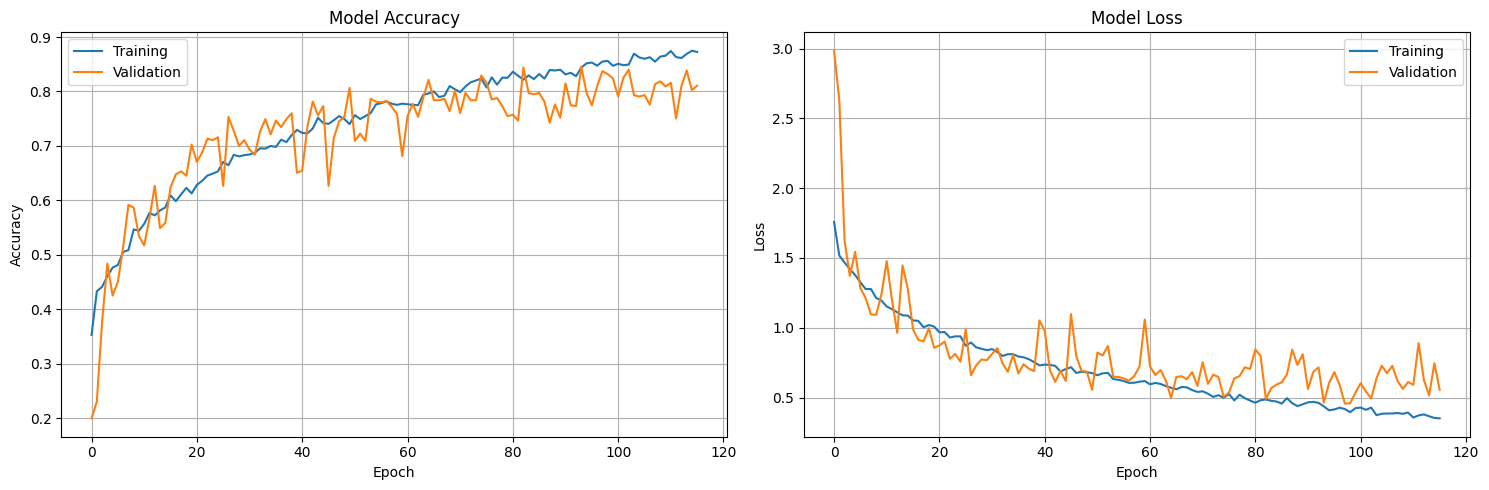


Train Set Evaluation:
219/219 ━━━━━━━━━━━━━━━━━━━━ 61s 273ms/step


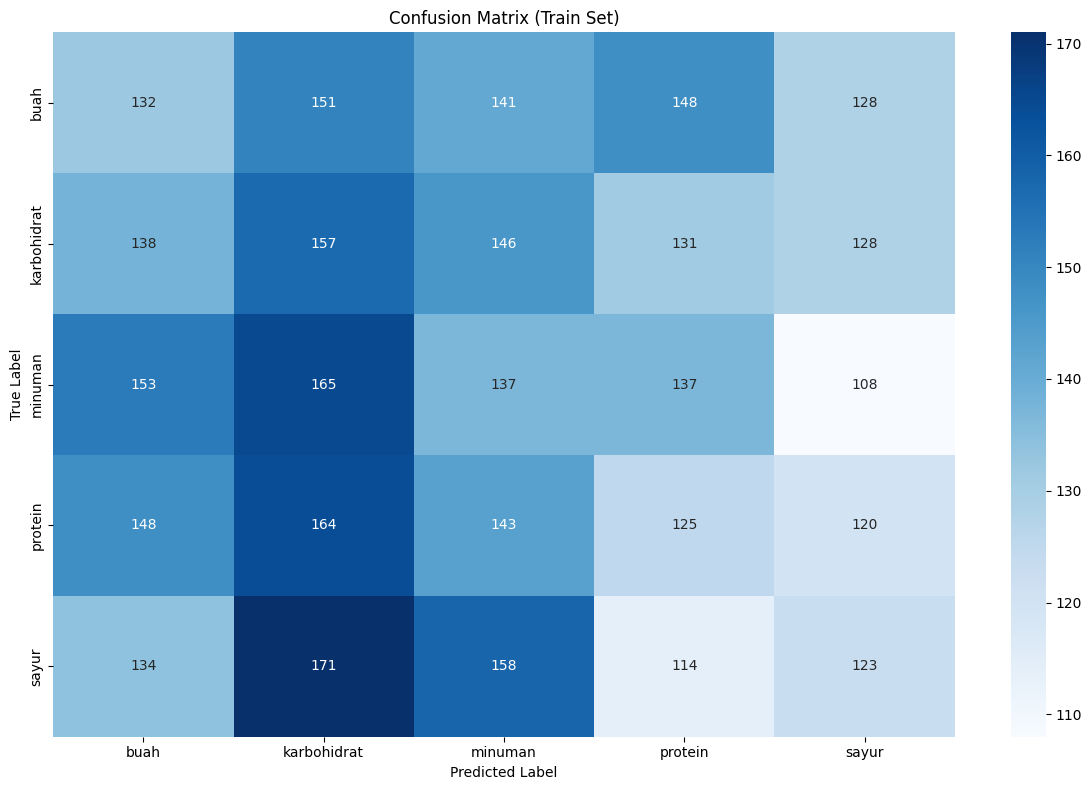


Classification Report (Train Set):
              precision    recall  f1-score   support

        buah       0.19      0.19      0.19       700
 karbohidrat       0.19      0.22      0.21       700
     minuman       0.19      0.20      0.19       700
     protein       0.19      0.18      0.18       700
       sayur       0.20      0.18      0.19       700

    accuracy                           0.19      3500
   macro avg       0.19      0.19      0.19      3500
weighted avg       0.19      0.19      0.19      3500


Train Set Accuracy: 0.9129
Train Set Loss: 0.2421

Validation Set Evaluation:
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


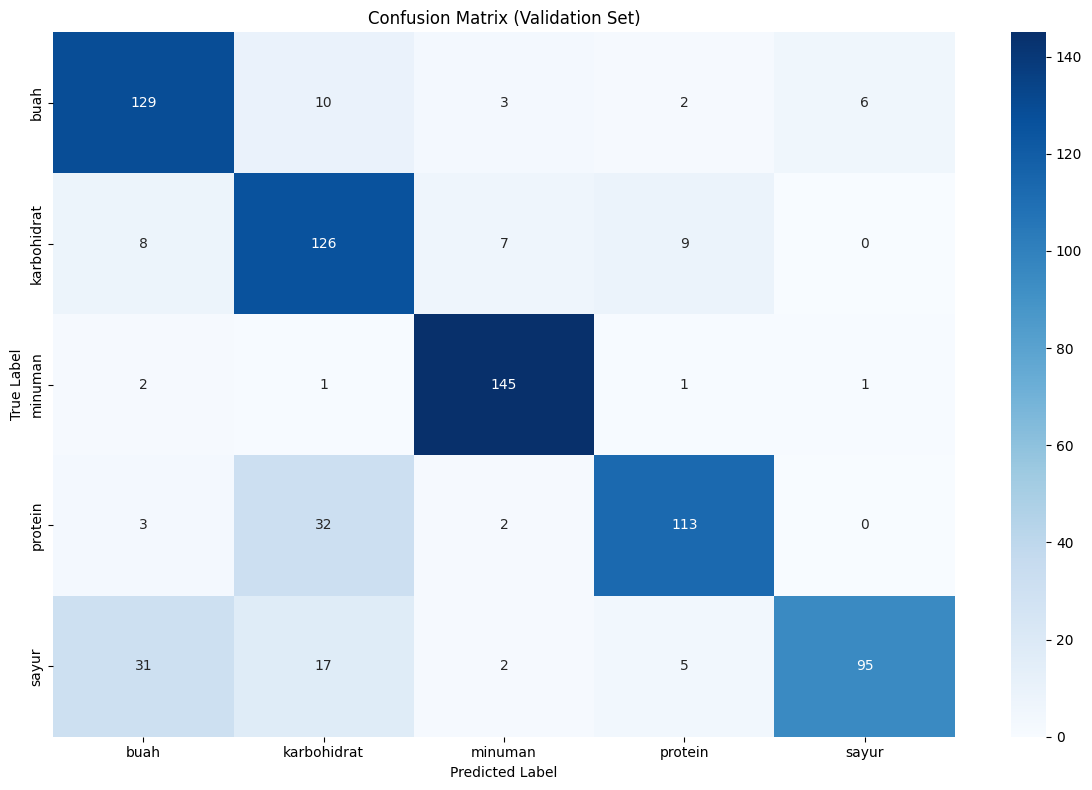


Classification Report (Validation Set):
              precision    recall  f1-score   support

        buah       0.75      0.86      0.80       150
 karbohidrat       0.68      0.84      0.75       150
     minuman       0.91      0.97      0.94       150
     protein       0.87      0.75      0.81       150
       sayur       0.93      0.63      0.75       150

    accuracy                           0.81       750
   macro avg       0.83      0.81      0.81       750
weighted avg       0.83      0.81      0.81       750


Validation Set Accuracy: 0.8107
Validation Set Loss: 0.5556

Test Set Evaluation:
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step


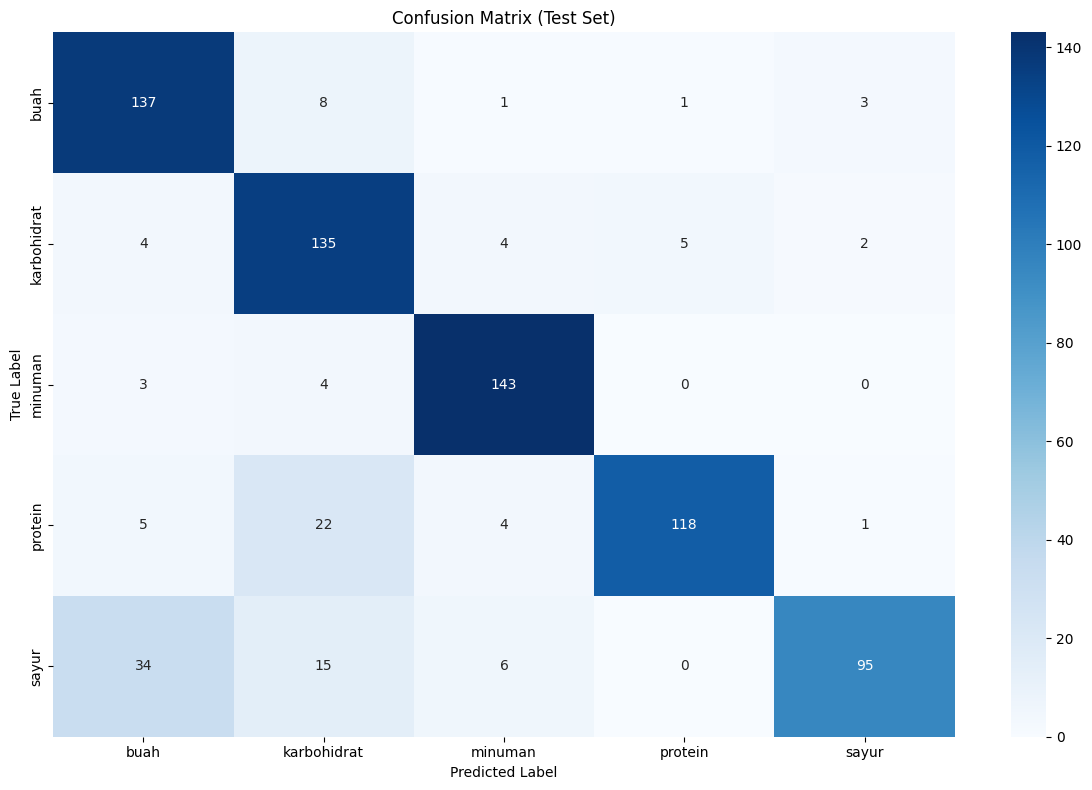


Classification Report (Test Set):
              precision    recall  f1-score   support

        buah       0.75      0.91      0.82       150
 karbohidrat       0.73      0.90      0.81       150
     minuman       0.91      0.95      0.93       150
     protein       0.95      0.79      0.86       150
       sayur       0.94      0.63      0.76       150

    accuracy                           0.84       750
   macro avg       0.86      0.84      0.84       750
weighted avg       0.86      0.84      0.84       750


Test Set Accuracy: 0.8373
Test Set Loss: 0.5499

Model and training history saved successfully!


In [2]:
#Versi 2
#Total Dataset: 5000
#Splitting Dataset 70% Train, 15% Test, 15% Validation

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Dataset paths
base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')
test_dir = os.path.join(base_dir, 'test')

# Print dataset distribution
def print_dataset_info():
    # categories = ['karbohidrat', 'protein', 'buah', 'sayur', 'minuman']
    categories = ['buah', 'karbohidrat', 'minuman', 'protein', 'sayur']
    for split, directory in [('Training', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
        print(f"\n{split} Dataset Distribution:")
        total = 0
        for category in categories:
            path = os.path.join(directory, category)
            count = len(os.listdir(path)) if os.path.exists(path) else 0
            total += count
            print(f'{category}: {count} images')
        print(f'Total: {total} images')

print_dataset_info()

# Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=30,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # # vertical_flip=False,
    # fill_mode='nearest',
    # brightness_range=[0.8, 1.2],
    # preprocessing_function=lambda x: tf.image.random_contrast(x, 0.8, 1.2),
    ##tambahan
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    preprocessing_function=lambda x: tf.image.random_contrast(x, 0.8, 1.2)
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image size and batch configuration
IMG_SIZE = 224  # Increased image size
BATCH_SIZE = 16 # Smaller batch size for better generalization

# Create generators with class balancing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

#Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        
        # Check if metrics exist
        if train_accuracy is not None and val_accuracy is not None:
            accuracy_gap = abs(train_accuracy - val_accuracy)
            
            # Check if accuracy >= 95% and gap < 15%
            if train_accuracy >= 0.96 and accuracy_gap <= 0.15:
                print(f"\nPelatihan dihentikan pada epoch {epoch + 1}:")
                print(f"Akurasi training mencapai {train_accuracy:.2f} dan gap dengan validation {accuracy_gap:.2f} (> 0.15)")
                self.model.stop_training = True

# Callback Definition
callbacks = myCallback()
# Improved CNN Architecture
def create_improved_model():
    model = tf.keras.Sequential([
        # First Block - Initial features extraction
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Second Block - Increased complexity
        tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Block - Deep feature extraction
        tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Block - Final feature extraction
        tf.keras.layers.Conv2D(512, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512, (3, 3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Classifier
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return model

# Learning Rate Schedule
initial_learning_rate = 1e-4
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 30))

# Custom Callback for monitoring training
class TrainingMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch + 1) % 5 == 0:
            print(f"\nEpoch {epoch + 1} Summary:")
            print(f"Training Accuracy: {logs.get('accuracy'):.4f}")
            print(f"Validation Accuracy: {logs.get('val_accuracy'):.4f}")
            print(f"Training Loss: {logs.get('loss'):.4f}")
            print(f"Validation Loss: {logs.get('val_loss'):.4f}")
            print(f"Learning Rate: {self.model.optimizer.learning_rate.numpy():.2e}")

# Create and compile model
model = create_improved_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
EPOCHS = 116
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks = [callbacks]
)

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Model evaluation
def evaluate_model(model, generator, set_name="Test"):
    # Predictions
    predictions = model.predict(generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    
    # Get class names
    class_names = list(generator.class_indices.keys())
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix ({set_name} Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print(f"\nClassification Report ({set_name} Set):")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Overall Metrics
    loss, accuracy = model.evaluate(generator, verbose=0)
    print(f"\n{set_name} Set Accuracy: {accuracy:.4f}")
    print(f"{set_name} Set Loss: {loss:.4f}")

# Evaluate on validation and test sets
print("\nTrain Set Evaluation:")
evaluate_model(model, train_generator, "Train")

print("\nValidation Set Evaluation:")
evaluate_model(model, validation_generator, "Validation")

print("\nTest Set Evaluation:")
evaluate_model(model, test_generator, "Test")

# Save model and history
model.save('/kaggle/working/FINAL_MODEL.h5')
history_df = pd.DataFrame(history.history)
history_df.to_csv('/kaggle/working/training_history.csv')
print("\nModel and training history saved successfully!")

In [3]:
#Versi 3
#Total Dataset: 5000
#Splitting Dataset 70% Train, 15% Test, 15% Validation

# import tensorflow as tf
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns

# # Dataset paths
# base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validasi')
# test_dir = os.path.join(base_dir, 'test')

# # Print dataset distribution
# def print_dataset_info():
#     categories = ['buah', 'karbohidrat', 'minuman', 'protein', 'sayur']
#     for split, directory in [('Training', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
#         print(f"\n{split} Dataset Distribution:")
#         total = 0
#         for category in categories:
#             path = os.path.join(directory, category)
#             count = len(os.listdir(path)) if os.path.exists(path) else 0
#             total += count
#             print(f'{category}: {count} images')
#         print(f'Total: {total} images')

# print_dataset_info()

# # Enhanced Data Augmentation with more aggressive transformations
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest',
#     brightness_range=[0.7, 1.3],
#     shear_range=0.2,
#     channel_shift_range=0.2,
#     preprocessing_function=lambda x: tf.image.random_contrast(x, 0.7, 1.3)
# )

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Increased image size and adjusted batch size
# IMG_SIZE = 256  # Increased from 224
# BATCH_SIZE = 32 # Increased for better stability

# # Create generators with class balancing
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=True
# )

# validation_generator = val_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# # Modified Early Stopping Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=15,
#     restore_best_weights=True,
#     min_delta=0.001
# )

# # Modified Learning Rate Schedule
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=5,
#     min_lr=1e-6,
#     verbose=1
# )

# # Improved CNN Architecture with Residual Connections
# def create_improved_model():
#     inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
#     # Initial Conv Block
#     x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
#     # Residual Block 1
#     shortcut = x
#     x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     shortcut = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(shortcut)
#     x = tf.keras.layers.Add()([x, shortcut])
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(2)(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
    
#     # Residual Block 2
#     shortcut = x
#     x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     shortcut = tf.keras.layers.Conv2D(256, (1, 1), padding='same')(shortcut)
#     x = tf.keras.layers.Add()([x, shortcut])
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(2)(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
    
#     # Global Average Pooling and Dense Layers
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = tf.keras.layers.Dense(512)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
#     outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    
#     model = tf.keras.Model(inputs, outputs)
#     return model

# # Create and compile model with mixed precision
# tf.keras.mixed_precision.set_global_policy('mixed_float16')
# model = create_improved_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)

# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Train model
# EPOCHS = 100
# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     callbacks=[early_stopping, reduce_lr]
# )

# # # Train model
# # EPOCHS = 100
# # history = model.fit(
# #     train_generator,
# #     epochs=EPOCHS,
# #     validation_data=validation_generator,
# #     callbacks=[early_stopping, reduce_lr],
# #     workers=4,
# #     use_multiprocessing=True
# # )

# # Plot training history
# def plot_training_history(history):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Accuracy plot
#     ax1.plot(history.history['accuracy'], label='Training')
#     ax1.plot(history.history['val_accuracy'], label='Validation')
#     ax1.set_title('Model Accuracy')
#     ax1.set_xlabel('Epoch')
#     ax1.set_ylabel('Accuracy')
#     ax1.legend()
#     ax1.grid(True)
    
#     # Loss plot
#     ax2.plot(history.history['loss'], label='Training')
#     ax2.plot(history.history['val_loss'], label='Validation')
#     ax2.set_title('Model Loss')
#     ax2.set_xlabel('Epoch')
#     ax2.set_ylabel('Loss')
#     ax2.legend()
#     ax2.grid(True)
    
#     plt.tight_layout()
#     plt.show()

# plot_training_history(history)

# # Model evaluation
# def evaluate_model(model, generator, set_name="Test"):
#     # Predictions
#     predictions = model.predict(generator, verbose=1)
#     y_pred = np.argmax(predictions, axis=1)
#     y_true = generator.classes
    
#     # Get class names
#     class_names = list(generator.class_indices.keys())
    
#     # Confusion Matrix
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=class_names,
#                 yticklabels=class_names)
#     plt.title(f'Confusion Matrix ({set_name} Set)')
#     plt.ylabel('True Label')
#     plt.xlabel('Predicted Label')
#     plt.tight_layout()
#     plt.show()
    
#     # Classification Report
#     print(f"\nClassification Report ({set_name} Set):")
#     print(classification_report(y_true, y_pred, target_names=class_names))
    
#     # Overall Metrics
#     loss, accuracy = model.evaluate(generator, verbose=0)
#     print(f"\n{set_name} Set Accuracy: {accuracy:.4f}")
#     print(f"{set_name} Set Loss: {loss:.4f}")

# # Evaluate on validation and test sets
# # print("\Train Set Evaluation:")
# # evaluate_model(model, train_generator, "Train")

# print("\nValidation Set Evaluation:")
# evaluate_model(model, validation_generator, "Validation")

# print("\nTest Set Evaluation:")
# evaluate_model(model, test_generator, "Test")

# # Save model and history
# model.save('/kaggle/working/model.h5')
# history_df = pd.DataFrame(history.history)
# history_df.to_csv('/kaggle/working/training_history.csv')
# print("\nModel and training history saved successfully!")

In [4]:
# Versi 4
#Total Dataset: 5000
#Splitting Dataset 70% Train, 15% Test, 15% Validation

# import tensorflow as tf
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# from sklearn.utils.class_weight import compute_class_weight

# # Dataset paths
# base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validasi')
# test_dir = os.path.join(base_dir, 'test')

# # Print dataset distribution
# def print_dataset_info():
#     categories = ['buah', 'karbohidrat', 'minuman', 'protein', 'sayur']
#     for split, directory in [('Training', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
#         print(f"\n{split} Dataset Distribution:")
#         total = 0
#         for category in categories:
#             path = os.path.join(directory, category)
#             count = len(os.listdir(path)) if os.path.exists(path) else 0
#             total += count
#             print(f'{category}: {count} images')
#         print(f'Total: {total} images')

# print_dataset_info()

# # Enhanced Data Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=45,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     zoom_range=0.4,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest',
#     brightness_range=[0.6, 1.4],
#     shear_range=0.3,
#     channel_shift_range=0.3,
#     validation_split=0.1,
#     preprocessing_function=lambda x: tf.image.random_contrast(x, 0.6, 1.4)
# )

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Image parameters
# IMG_SIZE = 128
# BATCH_SIZE = 16

# # Create generators
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=True
# )

# validation_generator = val_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# # Calculate class weights
# class_weights = compute_class_weight(
#     'balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )
# class_weight_dict = dict(enumerate(class_weights))

# # Improved model architecture
# def create_improved_model():
#     inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
#     # Initial Conv Block with increased filters
#     x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(inputs)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
    
#     # Deep Residual Blocks
#     # Sebelum: 128, 256, 512
#     for filters in [64, 128, 256]:
#         # First block
#         shortcut = x
#         x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
#         x = tf.keras.layers.BatchNormalization()(x)
#         x = tf.keras.layers.Activation('relu')(x)
#         x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
#         x = tf.keras.layers.BatchNormalization()(x)
        
#         # Shortcut connection
#         if shortcut.shape[-1] != filters:
#             shortcut = tf.keras.layers.Conv2D(filters, (1, 1))(shortcut)
#             shortcut = tf.keras.layers.BatchNormalization()(shortcut)
        
#         x = tf.keras.layers.Add()([x, shortcut])
#         x = tf.keras.layers.Activation('relu')(x)
#         x = tf.keras.layers.MaxPooling2D(2)(x)
#         x = tf.keras.layers.Dropout(0.3)(x)
    
#     # Global pooling and dense layers
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = tf.keras.layers.Dense(1024)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
    
#     # Additional dense layer
#     x = tf.keras.layers.Dense(512)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
    
#     outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    
#     return tf.keras.Model(inputs, outputs)

# # Learning rate schedule
# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.9,
#     staircase=True
# )

# # Optimizer
# optimizer = tf.keras.optimizers.AdamW(
#     learning_rate=lr_schedule,
#     weight_decay=0.0001
# )

# # Create and compile model
# model = create_improved_model()

# # Compile with mixed precision
# tf.keras.mixed_precision.set_global_policy('mixed_float16')
# # optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(
#     tf.keras.optimizers.AdamW(
#         learning_rate=lr_schedule,
#         weight_decay=0.0001
#     )
# )

# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# )

# # Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss',
#         patience=20,
#         restore_best_weights=True,
#         min_delta=0.0001
#     ),
#     tf.keras.callbacks.ReduceLROnPlateau(
#         monitor='val_loss',
#         factor=0.2,
#         patience=7,
#         min_lr=1e-7,
#         verbose=1
#     ),
#     tf.keras.callbacks.ModelCheckpoint(
#         'best_model.keras',
#         monitor='val_accuracy',
#         save_best_only=True,
#         mode='max'
#     )
# ]

# # Training parameters
# EPOCHS = 100
# ACCUMULATION_STEPS = 4

# # # Training with gradient accumulation
# # @tf.function
# # def train_step(x, y):
# #     with tf.GradientTape() as tape:
# #         logits = model(x, training=True)
# #         loss = tf.keras.losses.categorical_crossentropy(y, logits)
# #         loss = tf.reduce_mean(loss)
# #         scaled_loss = loss
    
# #     scaled_gradients = tape.gradient(scaled_loss, model.trainable_variables)
# #     gradients = optimizer.get_unscaled_gradients(scaled_gradients)
# #     return loss, gradients

# @tf.function
# def train_step(x, y):
#     with tf.GradientTape() as tape:
#         logits = model(x, training=True)
#         loss = tf.keras.losses.categorical_crossentropy(y, logits)
#         loss = tf.reduce_mean(loss)

#     scaled_gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(scaled_gradients, model.trainable_variables))

#     return loss, scaled_gradients


# # Training loop
# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch+1}/{EPOCHS}')
    
#     # Reset metrics
#     train_loss = tf.keras.metrics.Mean()
#     train_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
#     # Training loop with gradient accumulation
#     accumulated_gradients = None
#     step = 0
    
#     for x_batch, y_batch in train_generator:
#         loss, gradients = train_step(x_batch, y_batch)
        
#         if accumulated_gradients is None:
#             accumulated_gradients = gradients
#         else:
#             accumulated_gradients = [ag + g for ag, g in zip(accumulated_gradients, gradients)]
        
#         train_loss.update_state(loss)
#         train_accuracy.update_state(y_batch, model(x_batch, training=False))
        
#         step += 1
#         if step % ACCUMULATION_STEPS == 0:
#             # Apply accumulated gradients
#             optimizer.apply_gradients(zip(accumulated_gradients, model.trainable_variables))
#             accumulated_gradients = None
        
#         if step >= len(train_generator):
#             break
    
#     # Validation step
#     val_loss = tf.keras.metrics.Mean()
#     val_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
#     for x_val, y_val in validation_generator:
#         val_logits = model(x_val, training=False)
#         val_loss.update_state(
#             tf.keras.losses.categorical_crossentropy(y_val, val_logits)
#         )
#         val_accuracy.update_state(y_val, val_logits)
    
#     print(f'Training Loss: {train_loss.result():.4f}')
#     print(f'Training Accuracy: {train_accuracy.result():.4f}')
#     print(f'Validation Loss: {val_loss.result():.4f}')
#     print(f'Validation Accuracy: {val_accuracy.result():.4f}')

# # Plotting functions
# def plot_training_history(history):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Accuracy plot
#     ax1.plot(history.history['accuracy'], label='Training')
#     ax1.plot(history.history['val_accuracy'], label='Validation')
#     ax1.set_title('Model Accuracy')
#     ax1.set_xlabel('Epoch')
#     ax1.set_ylabel('Accuracy')
#     ax1.legend()
#     ax1.grid(True)
    
#     # Loss plot
#     ax2.plot(history.history['loss'], label='Training')
#     ax2.plot(history.history['val_loss'], label='Validation')
#     ax2.set_title('Model Loss')
#     ax2.set_xlabel('Epoch')
#     ax2.set_ylabel('Loss')
#     ax2.legend()
#     ax2.grid(True)
    
#     plt.tight_layout()
#     plt.show()

# def evaluate_model(model, generator, set_name="Test"):
#     predictions = model.predict(generator, verbose=1)
#     y_pred = np.argmax(predictions, axis=1)
#     y_true = generator.classes
    
#     class_names = list(generator.class_indices.keys())
    
#     # Confusion Matrix
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=class_names,
#                 yticklabels=class_names)
#     plt.title(f'Confusion Matrix ({set_name} Set)')
#     plt.ylabel('True Label')
#     plt.xlabel('Predicted Label')
#     plt.tight_layout()
#     plt.show()
    
#     # Classification Report
#     print(f"\nClassification Report ({set_name} Set):")
#     print(classification_report(y_true, y_pred, target_names=class_names))
    
#     # Overall Metrics
#     loss, accuracy, precision, recall = model.evaluate(generator, verbose=0)
#     print(f"\n{set_name} Set Metrics:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Loss: {loss:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")

# # Evaluate model
# print("\nEvaluating on Train Set:")
# evaluate_model(model, train_generator, "Train")

# print("\nEvaluating on Validation Set:")
# evaluate_model(model, validation_generator, "Validation")

# print("\nEvaluating on Test Set:")
# evaluate_model(model, test_generator, "Test")

# # Save model
# model.save('final_model.keras')# import tensorflow as tf
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# from sklearn.utils.class_weight import compute_class_weight

# # Dataset paths
# base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validasi')
# test_dir = os.path.join(base_dir, 'test')

# # Print dataset distribution
# def print_dataset_info():
#     categories = ['buah', 'karbohidrat', 'minuman', 'protein', 'sayur']
#     for split, directory in [('Training', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
#         print(f"\n{split} Dataset Distribution:")
#         total = 0
#         for category in categories:
#             path = os.path.join(directory, category)
#             count = len(os.listdir(path)) if os.path.exists(path) else 0
#             total += count
#             print(f'{category}: {count} images')
#         print(f'Total: {total} images')

# print_dataset_info()

# # Enhanced Data Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=45,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     zoom_range=0.4,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest',
#     brightness_range=[0.6, 1.4],
#     shear_range=0.3,
#     channel_shift_range=0.3,
#     validation_split=0.1,
#     preprocessing_function=lambda x: tf.image.random_contrast(x, 0.6, 1.4)
# )

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Image parameters
# IMG_SIZE = 128
# BATCH_SIZE = 16

# # Create generators
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=True
# )

# validation_generator = val_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

# # Calculate class weights
# class_weights = compute_class_weight(
#     'balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )
# class_weight_dict = dict(enumerate(class_weights))

# # Improved model architecture
# def create_improved_model():
#     inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
#     # Initial Conv Block with increased filters
#     x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(inputs)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
    
#     # Deep Residual Blocks
#     # Sebelum: 128, 256, 512
#     for filters in [64, 128, 256]:
#         # First block
#         shortcut = x
#         x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
#         x = tf.keras.layers.BatchNormalization()(x)
#         x = tf.keras.layers.Activation('relu')(x)
#         x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
#         x = tf.keras.layers.BatchNormalization()(x)
        
#         # Shortcut connection
#         if shortcut.shape[-1] != filters:
#             shortcut = tf.keras.layers.Conv2D(filters, (1, 1))(shortcut)
#             shortcut = tf.keras.layers.BatchNormalization()(shortcut)
        
#         x = tf.keras.layers.Add()([x, shortcut])
#         x = tf.keras.layers.Activation('relu')(x)
#         x = tf.keras.layers.MaxPooling2D(2)(x)
#         x = tf.keras.layers.Dropout(0.3)(x)
    
#     # Global pooling and dense layers
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = tf.keras.layers.Dense(1024)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
    
#     # Additional dense layer
#     x = tf.keras.layers.Dense(512)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
    
#     outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    
#     return tf.keras.Model(inputs, outputs)

# # Learning rate schedule
# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.9,
#     staircase=True
# )

# # Optimizer
# optimizer = tf.keras.optimizers.AdamW(
#     learning_rate=lr_schedule,
#     weight_decay=0.0001
# )

# # Create and compile model
# model = create_improved_model()

# # Compile with mixed precision
# tf.keras.mixed_precision.set_global_policy('mixed_float16')
# # optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(
#     tf.keras.optimizers.AdamW(
#         learning_rate=lr_schedule,
#         weight_decay=0.0001
#     )
# )

# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# )

# # Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss',
#         patience=20,
#         restore_best_weights=True,
#         min_delta=0.0001
#     ),
#     tf.keras.callbacks.ReduceLROnPlateau(
#         monitor='val_loss',
#         factor=0.2,
#         patience=7,
#         min_lr=1e-7,
#         verbose=1
#     ),
#     tf.keras.callbacks.ModelCheckpoint(
#         'best_model.keras',
#         monitor='val_accuracy',
#         save_best_only=True,
#         mode='max'
#     )
# ]

# # Training parameters
# EPOCHS = 100
# ACCUMULATION_STEPS = 4

# # # Training with gradient accumulation
# # @tf.function
# # def train_step(x, y):
# #     with tf.GradientTape() as tape:
# #         logits = model(x, training=True)
# #         loss = tf.keras.losses.categorical_crossentropy(y, logits)
# #         loss = tf.reduce_mean(loss)
# #         scaled_loss = loss
    
# #     scaled_gradients = tape.gradient(scaled_loss, model.trainable_variables)
# #     gradients = optimizer.get_unscaled_gradients(scaled_gradients)
# #     return loss, gradients

# @tf.function
# def train_step(x, y):
#     with tf.GradientTape() as tape:
#         logits = model(x, training=True)
#         loss = tf.keras.losses.categorical_crossentropy(y, logits)
#         loss = tf.reduce_mean(loss)

#     scaled_gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(scaled_gradients, model.trainable_variables))

#     return loss, scaled_gradients


# # Training loop
# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch+1}/{EPOCHS}')
    
#     # Reset metrics
#     train_loss = tf.keras.metrics.Mean()
#     train_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
#     # Training loop with gradient accumulation
#     accumulated_gradients = None
#     step = 0
    
#     for x_batch, y_batch in train_generator:
#         loss, gradients = train_step(x_batch, y_batch)
        
#         if accumulated_gradients is None:
#             accumulated_gradients = gradients
#         else:
#             accumulated_gradients = [ag + g for ag, g in zip(accumulated_gradients, gradients)]
        
#         train_loss.update_state(loss)
#         train_accuracy.update_state(y_batch, model(x_batch, training=False))
        
#         step += 1
#         if step % ACCUMULATION_STEPS == 0:
#             # Apply accumulated gradients
#             optimizer.apply_gradients(zip(accumulated_gradients, model.trainable_variables))
#             accumulated_gradients = None
        
#         if step >= len(train_generator):
#             break
    
#     # Validation step
#     val_loss = tf.keras.metrics.Mean()
#     val_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
#     for x_val, y_val in validation_generator:
#         val_logits = model(x_val, training=False)
#         val_loss.update_state(
#             tf.keras.losses.categorical_crossentropy(y_val, val_logits)
#         )
#         val_accuracy.update_state(y_val, val_logits)
    
#     print(f'Training Loss: {train_loss.result():.4f}')
#     print(f'Training Accuracy: {train_accuracy.result():.4f}')
#     print(f'Validation Loss: {val_loss.result():.4f}')
#     print(f'Validation Accuracy: {val_accuracy.result():.4f}')

# # Plotting functions
# def plot_training_history(history):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Accuracy plot
#     ax1.plot(history.history['accuracy'], label='Training')
#     ax1.plot(history.history['val_accuracy'], label='Validation')
#     ax1.set_title('Model Accuracy')
#     ax1.set_xlabel('Epoch')
#     ax1.set_ylabel('Accuracy')
#     ax1.legend()
#     ax1.grid(True)
    
#     # Loss plot
#     ax2.plot(history.history['loss'], label='Training')
#     ax2.plot(history.history['val_loss'], label='Validation')
#     ax2.set_title('Model Loss')
#     ax2.set_xlabel('Epoch')
#     ax2.set_ylabel('Loss')
#     ax2.legend()
#     ax2.grid(True)
    
#     plt.tight_layout()
#     plt.show()

# def evaluate_model(model, generator, set_name="Test"):
#     predictions = model.predict(generator, verbose=1)
#     y_pred = np.argmax(predictions, axis=1)
#     y_true = generator.classes
    
#     class_names = list(generator.class_indices.keys())
    
#     # Confusion Matrix
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=class_names,
#                 yticklabels=class_names)
#     plt.title(f'Confusion Matrix ({set_name} Set)')
#     plt.ylabel('True Label')
#     plt.xlabel('Predicted Label')
#     plt.tight_layout()
#     plt.show()
    
#     # Classification Report
#     print(f"\nClassification Report ({set_name} Set):")
#     print(classification_report(y_true, y_pred, target_names=class_names))
    
#     # Overall Metrics
#     loss, accuracy, precision, recall = model.evaluate(generator, verbose=0)
#     print(f"\n{set_name} Set Metrics:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Loss: {loss:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")

# # Evaluate model
# print("\nEvaluating on Train Set:")
# evaluate_model(model, train_generator, "Train")

# print("\nEvaluating on Validation Set:")
# evaluate_model(model, validation_generator, "Validation")

# print("\nEvaluating on Test Set:")
# evaluate_model(model, test_generator, "Test")

# # Save model
# model.save('final_model.keras')

In [5]:
# # Evaluate on train sets
# print("Train Set Evaluation:")
# evaluate_model(model, train_generator, "Train")